# Chapter 10. 워드 임베딩과 문맥 파악

이 장에서는 BOW와 비교하여 워드 임베딩의 의미와 활용방안에 대해 이해하고자 한다. 워드 임베딩은 주로 딥러닝 기반의 자연어 처리에서 많이 활용되는 기법으로 BOW가 단어의 시퀀스인 문서를 임베딩하는 것과 대조된다. 딥러닝에서는 문서 단위보다는 단어 단위로 임베딩을 해서 단어의 시퀀스를 유지하고 이를 이해하는 방향으로 학습을 진행함으로써 문맥을 파악한다는 점에서 차이가 있다. 워드 임베딩은 일반적인 학습에서의 사용 외에 트랜스퍼 러닝을 통해 임베딩 결과를 공유하기 위한 방법들도 제시가 되어 있으며 그 예로 Word2Vec, ELMo 등이 있다. 이 장에서는 이러한 기법에 대해서도 이해하고 사용법을 알아본다.

## 1. BOW와 워드 임베딩 비교

### 1.1 워드 임베딩의 이해

우리가 갖고 있는 대부분의 분석 방법론이 수치 형태의 데이터를 다루기 때문에, 범주형 데이터를 분석하기 위해서는 먼저 이를 수치로 변환해야 한다. 일반적으로 범주형 데이터를 수치로 변환하는 방법으로 더미변수의 이용과 임베딩이 있다. 더미변수는 0과 1만으로 범주형 데이터를 표현한다. 예를 들어 성별은 두 개의 값만 가지므로 더미변수 하나를 이용하여 0과 1로 표현이 가능하다. 만일 A, B, AB, O형의 혈액형을 나타내고자 한다면 네 개의 더미변수를 사용한다. 더미변수를 d1, d2, d3, d4라고 한다면 각 더미변수는 네 개의 혈액형을 의미하고 해당 혈액형이면 1, 아니면 0으로 다음과 같이 표현하게 된다.

- A: [1, 0, 0, 0]
- B: [0, 1, 0, 0]
- AB: [0, 0, 1, 0]
- O: [0, 0, 0, 1]

이와 같이 범주형 데이터를 벡터 형태의 연속된 수치로 변환하는 것을 머신러닝에서는 원핫 인코딩(one-hot encoding)이라고 하고 그 결과를 원핫 벡터(one-hot vector)라고 한다. 단어에 대해 원핫 인코딩을 수행하면 말뭉치에 사용된 단어의 수만큼 더미변수가 필요한데, 예를 들어 2만 개의 단어가 사용되었다면 하나의 단어를 표현하기 위해 더미변수 2만 개가 필요하다. 문서를 카운트 기반의 벡터로 변환했을 때에도 매우 희소한 벡터가 생성이 되었는데, 단어는 그보다 훨씬 심각하게 희소한 벡터가 된다. 왜냐하면 2만 개의 값 중에 오직 하나의 변수만 1의 값을 갖기 때문이다.

임베딩은 범주형 데이터를 연속적인 값을 갖는, 상대적으로 작은 크기의 벡터로 변환하는 작업을 의미한다. 워드 임베딩은 보통 단어에 대해 원핫 인코딩을 먼저 수행하고 이를 다시 연속형 값을 갖는 축소된 벡터로 변환하는 과정을 의미한다. 기존의 연구 결과를 보면, 이 때 축소된 벡터의 크기는 100 ~ 300 정도이고 이러한 벡터를 희소벡터(sparse vector)의 반대개념인 밀집벡터(dense vector)라고 부른다. 즉, 수만 개의 더미변수가 100 ~ 300개의 연속형 변수로 압축되는 대신 대부분의 변수가 0이 아닌 연속적인 값을 갖게 된다.

### 그림 필요

그렇다면 이와 같은 임베딩은 왜 하는 것일까? 첫째, 차원이 큰 원핫 벡터를 그대로 사용하면 연산이 비효율적일 수 밖에 없다. 공간이나 연산의 효율을 생각했을 때 이와 같은 임베딩 벡터를 사용하는 것이 더 나을 것이라는 것은 쉽게 예상할 수 있다. 둘째 이유는 대상 간의 의미적 유사도를 계산할 수 있다는 점이다. 

원핫 인코딩을 사용하는 이유로 돌아가보자. 혈액형 A, B, C, D를 수치로 변환할 때, 왜 1, 2, 3, 4로 하면 안되는 것일까? 이렇게 하면 잘못된 데이터 간 거리가 생성되기 때문이다. 예를 들어 혈액형 A는 D와의 거리가 3이 되고, 그 결과 A는 B에 비해 혈액형 D와의 거리가 세 배 먼 것이 된다. 또한 혈액형 D는 A보다 네 배 큰 값이 된다. 즉 수치 데이터가 잘못된 수치적 가정을 갖게 된다. 원핫 인코딩을 하면 모든 데이터 간의 거리가 동일하게 유지되어 이러한 잘못된 가정들이 사라지게 된다. 

그러나 단어 사이에는 분명 어떤 유사도가 존재한다. 예를 들어 사과는 과일이라는 점에서 책상보다 귤에 더 가깝다. 만일 이러한 유사도를 표현하고 계산할 수 있다면 뭔가 더 유용한 작업을 할 수 있을 것이다. 

셋째, 단어가 의미적인 정보를 함축함으로써 연산이 가능해질 수 있다. 이는 Word2Vec을 통해 널리 알려진 것으로 king에 woman을 더하고 man을 빼면 queen이 된다. 즉 king와 man 그리고 queen과 woman의 관계를 이용함으로써 연산을 통한 일종의 추론이 가능해진다.

넷째, 트랜스퍼 러닝(transfer learning) 즉 전이학습을 가능하게 한다. 전이학습은 기존에 학습된 모형을 새로운 환경에서 재사용함으로써 학습의 속도와 효과를 높이는 방법이다. 여기서 모형에는 학습을 통해서 계산된 가중치가 포함된다. 임베딩은 앞서 설명한 대로 원핫 인코딩에 의한 희소벡터를 축소된 밀집벡터로 변환하는 과정으로, 이 때 학습된 가중치 행렬을 이용하여 밀집벡터를 계산한다. 이 가중치 행렬을 가져와서 새로운 문제에 적용함으로써 학습에 소요되는 시간을 줄이고 결과를 향상시킬 수 있다. 

### 1.2 BOW와 문서 임베딩

BOW 혹은 카운트 기반의 문서 표현에서 하나의 문서는 사용된 단어들의 빈도를 벡터 형태로 표현하며, 넓게 보면 이것도 임베딩이라고 볼 수 있다. 굳이 "넓게 보면"이라고 이야기하는 이유는, 카운트 기반의 문서 표현에서는 희소벡터를 밀집벡터로 변환하는 과정이 없기 때문이다. 만일 우리가 학습이나 혹은 어떤 통계적 기법을 이용해서 희소벡터를 축소하여 밀집벡터로 변환하고 그 벡터로 분석을 수행한다면 보다 완전한 임베딩이라고 할 수 있을 것이다. 

그러나, 카운트 기반의 문서 표현은 코사인 유사도와 같은 방법을 사용하여 희소벡터 그 자체로 유사도 계산이 가능하다. 즉 범주형 변수에 대한 원핫 인코딩과는 다르게 어느 정도 문서의 의미가 반영되어 있으므로 임베딩이라고 봐도 무방할 것이다. 다만 BOW에서는 단어가 아닌 문서 단위로 임베딩이 이루어진다. 이 과정에서 단어의 순서 정보를 잃기 때문에 사실상 문맥에 대한 파악은 이루어지지 않는다고 할 수 있다.

### 1.3 워드 임베딩과 딥러닝

대부분의 딥러닝 기반의 자연어처리 기법에서는 문서를 단어의 시퀀스로 표현한다. 따라서 문서를 직접 임베딩하기 보다는 단어를 임베딩하고, 임베딩된 단어의 시퀀스로 문서를 표현한다. BOW와의 가장 큰 차이점은 바로 단어의 순서를 고려하여 문맥을 파악한다는 점이다. 이로 인해 문서에 대한 표현에서도 큰 차이가 발생하는데, BOW에서는 문서가 1차원 벡터로 표현되는 반면, 워드 임베딩을 이용하게 되면 문서가 2차원 행렬 혹은 1차원 벡터의 리스트로 표현된다. 이는 워드 임베딩 결과가 이미 1차원 벡터이기 때문이다. 처음 딥러닝 기반의 자연어 처리를 접하게 되면 이 부분에서 혼란을 겪는 경우가 많다. 말뭉치로부터 입력 값을 만들면 여러 개의 문서를 변환하기 때문에 결과적으로 3차원 행렬이 되는데, 이것이 처음에는 머리 속에 잘 그려지지 않는다.

워드 임베딩에 기반한 딥러닝 자연어 처리의 핵심은 단어의 순서로부터 어떻게 문맥정보를 추출해낼 것인가에 달려있다고 할 수 있다. 딥러닝을 공부한 사람이라면 자연스럽게 RNN을 머리 속에 떠올릴 것이다. RNN은 시계열과 같은 순서 패턴을 분석하므로 단어가 쓰여진 순서의 패턴으로 문맥을 파악할 수 있을 것이다. 이에 대해서는 다음 장에서 상세히 알아보기로 하고 이 장에서는 워드 임베딩에 집중하기로 한다.

## 2. Word2Vec - 대표적인 워드 임베딩 기법

### 2.1 Word2Vec 학습의 원리

Word2Vec은 가장 널리 알려진 워드 임베딩 기법이라고 할 수 있다. 지금 구글링을 하면 Word2Vec을 설명한 수많은 문서를 볼 수 있다. 따라서 이 책에서는 가급적 간단하게 학습 원리를 설명하고자 한다. 단어를 원핫 벡터로 표현하는 것은 기계적이지만 이 원핫 벡터를 밀집벡터로 변환하기 위해서는 반드시 학습이 있어야 한다. Word2Vec 기법에서 학습의 목적은 단어에 의미적인 정보를 함축함으로써 유사도를 계산하거나 연산을 수행하고, 더 나아가서 학습된 결과를 다른 작업에서도 사용할 수 있는 전이학습을 지원하는 것이다.

이와 같은 범용적인 사용을 목표로 한다면 어떻게 학습을 해야 할까? Word2Vec은 주변의 단어를 이용하여 중심에 있는 단어를 예측하도록 학습을 한다(CBOW에 한하여). 사람이 언어에 대해 이해하고 있다는 것은 여러가지 의미를 가지고 있지만 그 중 가장 중요한 것 중 하나는 바로 문장에서 사용되는 단어에 대한 예측이다. 이러한 예측은 단어들의 순서 즉 문맥을 이해할 때에만 가능하다. 다시 말해서 Word2Vec은 다음 단어 혹은 주변 단어에 대한 예측을 잘 할 수 있도록 학습함으로써 문맥을 이해시키고, 밀집벡터에 그러한 문맥 정보를 담으려는 시도라고 이해할 수 있다.

Word2Vec은 CBOW(Continuous Bag of Words)와 Skip-Gram의 두가지 학습 방식을 갖고 있다. CBOW는 앞서 설명한 바와 같이 주변의 단어를 이용하여 중심단어를 예측하도록 학습을 수행한다. 반면 Skip-Gram은 중심의 한 단어를 이용하여 주변의 단어를 예측한다. 먼저 CBOW에 대해 더 알아보자.

CBOW는 "Alice was beginning to get very tired of sitting by her sister on the bank"라는 문장이 있을 때, 앞에 있는 'Alice', 'was'의 두 단어와 뒤에 있는 'to', 'get'으로 'beginning'을 예측하도록 학습을 한다. 이 때 앞 뒤의 단어들을 몇 개씩 예측에 사용할까를 결정하는 범위를 윈도우라고 한다. 이 예에서는 각 두 단어씩을 사용하고 있기 때문에 윈도우의 크기는 2가 된다. 만일 윈도우 크기가 1이라면 'was'와 'to' 만으로 예측해야 한다. 이 윈도우를 앞에서부터 한칸 이동하면 다음에는 'was', 'beginning'과 'get', 'very'로 'to'를 예측한다. 즉 문장에서 윈도우를 뒤로 이동시키면 계속해서 학습에 사용할 입력과 출력을 생성할 수 있다.

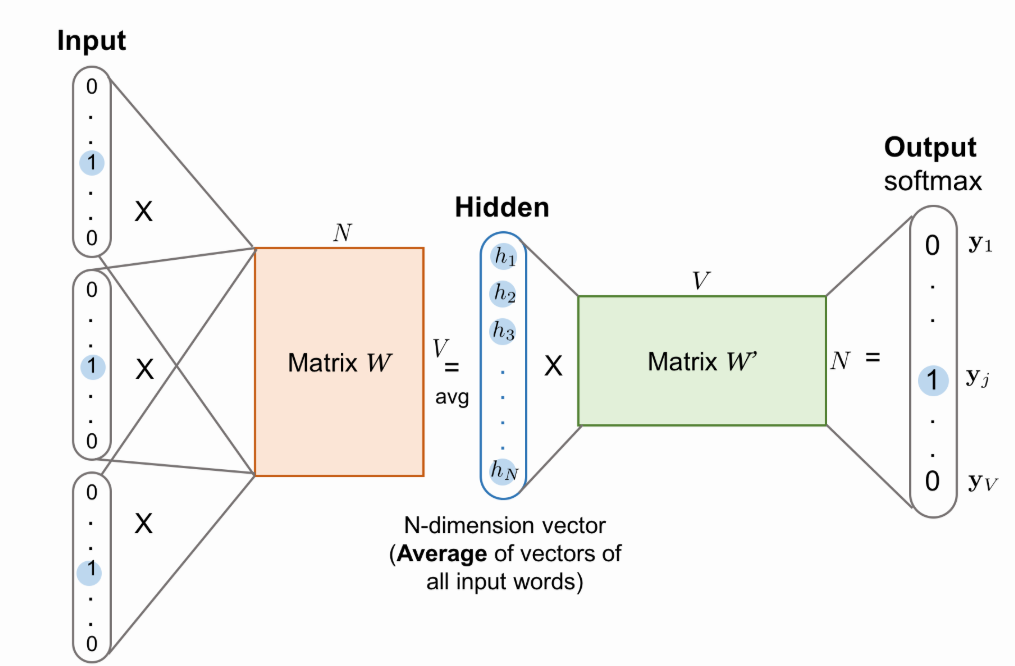
<출처: https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html#context-based-continuous-bag-of-words-cbow>

위 그림은 저자가 볼 때 CBOW의 구조를 가장 잘 설명해주는 그림이다. 그림에서는 세 개의 주변 단어를 이용하여 (원래대로 하자면 사용하는 주변 단어는 짝수가 되어야 하겠지만) 하나의 중심 단어를 예측하고 있다. 세 개의 단어는 모두 원핫 벡터로 먼저 표현된다. 벡터의 크기는 사용된 어휘(vocabulary)의 수와 동일하고 V로 표현한다. 이 벡터를 W로 표현된 가중치 행렬에 곱하면 N 크기의 밀집 벡터가 된다. 그림에서 은닉(Hidden) 노드의 크기가 N인데, 이는 만들어진 세 개의 밀집벡터에 대해 평균을 구하여 하나의 벡터로 만들었기 때문이다. V 크기의 원핫 벡터를 N 크기의 밀집벡터로 변환해야 하기 때문에 가중치 행렬 W는 VxN의 크기를 갖는다. 즉 행의 크기가 V, 열의 크기가 N인 행렬이며, 학습의 대상이 된다. 다시 말해서 학습에 의해 이 가중치 행렬의 값이 결정된다는 뜻이다. W에 비해 행과 열의 크기가 반대인 W'에 의해 은닉 벡터는 V 크기의 출력벡터로 변환된다. 예측해야 할 대상인 중심 단어를 원핫 벡터로 변환하면 역시 V 크기가 되는데, 출력벡터가 가급적 이 원핫 벡터와 유사해지도록 학습이 이루어진다. 이 과정에서 학습의 대상은 W와 W'인데, W를 자세히 보면 입력이 원핫 벡터이기 때문에, W의 한 행이 각 단어에 대한 밀집 벡터가 된다는 것을 알 수 있다. 즉 단어에 대한 원핫 벡터를 밀집 벡터로 변환하는 가중치 행렬 자체가 변환된 밀집벡터의 표시하고 있다. 이 말이 직관적으로 이해가 잘 되지 않는다면 아래 예제를 보자.

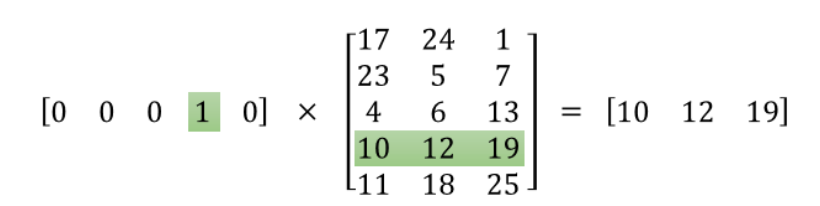
<출처: https://simonezz.tistory.com/35>

왼쪽의 원핫 벡터는 어휘집합에서 네번째 단어에 속한다. 여기에 가중치 행렬을 곱해주면 오른쪽과 같은 값이 나오는데, 이 값은 가중치 행렬의 넷째 행과 일치한다.

Word2Vec의 학습에는 Noise Contrastive Estimation, Negative Sampling과 같은 복잡한 아이디어가 사용되었는데, 이 책의 범위를 넘어가므로 생략하기로 한다. Skip-Gram은 CBOW와 달리 중심 단어를 입력으로 해서 주변의 여러 단어들을 예측한다는 점에서 차이가 있다.

### 2.2 Word2Vec 활용 - 학습된 모형 가져오기

Word2Vec을 활용하는 방법은, 대상 말뭉치에 대해 직접 학습을 함으로써 나만의 가중치 행렬 혹은 워드 임베딩 벡터를 생성하는 것과, 기존에 학습된 임베딩 벡터를 가져다 활용하는 두 가지 방법이 있다. 먼저 기존dp 학습된 임베딩 벡터를 가져와서 간단한 연산 등을 수행해 보기로 하자. 이를 위해 먼저 대표적인 Word2Vec 학습 지원 라이브러리를 제공하는 Gensim 패키지(1)를 아래와 같이 설치한다.

pip install --upgrade gensim

Gensim이 설치되었으면 아래와 같이 미리 학습된 임베딩 벡터를 다운로드한다. 사용할 수 있는 사전학습된 모델은 gensim 홈페이지(2)를 참조하다. 벡터의 사이즈가 클수록 다운받아야 할 양이 늘어나므로 잘 보고 선택한다. 예를 들어 구글 뉴스 데이터를 이용하여 학습한 Word2Vec 모델인 'word2vec-google-news-300'의 경우에는 거의 2GB에 가까운 양을 다운로드해야 한다. 

이 책에서는 가급적 다운로드 받아야 할 양을 줄이기 위해 'glove-wiki-gigaword-50'을 사용한다. 모델 이름의 마지막 숫자는 임베딩 벡터의 크기를 나타낸다. 이 값이 작을수록 모델의 사이즈도 작아진다. 반면 임베딩 벡터의 크기가 커지면 더 많은 정보량을 담을 수 있으므로 보다 정확한 임베딩이 가능하다.

실습은 Gensim 홈페이지(3)에 제공된 데모 코드를 참조하여 진행한다.

1: https://radimrehurek.com/gensim/index.html <br>
2: https://radimrehurek.com/gensim/models/word2vec.html <br>
3: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [1]:
# 미리 학습된 gensim data를 다운로드
import gensim.downloader as api

wv = api.load('glove-wiki-gigaword-50')

C:\Users\ParkSangun\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

type(wv)을 실행해서 wv의 유형을 보면 'gensim.models.keyedvectors.KeyedVectors'라고 출력된다. 이것은 단어와 그 단어의 임베딩 벡터 간의 매핑을 저장한 사전과 다양한 유사도 함수들로 구성된 객체라고 설명할 수 있다. 따라서 아래와 같이 가장 기본적으로 원하는 단어의 벡터를 찾아볼 수 있다.

In [2]:
vec_king = wv['king']
print('#Size of the vector:', len(vec_king))
print('#Vector for king:', vec_king)

#Size of the vector: 50
#Vector for king: [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


위 예에서는 king의 임베딩 벡터 크기와 내용을 출력했는데, 벡터를 구성하는 연속적인 값의 범위가 어느 정도인지 살펴보고 감을 잡을 수 있다. 앞서 설명한 바와 같이 wv는 다양한 유사도 관련 함수를 제공하는데, 아래와 같이 similarity 메서드를 이용하면 두 단어 간의 거리를 계산할 수 있다. 참고로 Gensim은 코사인 유사도를 기본으로 사용한다.

In [10]:
print(wv.similarity('king', 'man'), 'vs', wv.similarity('king', 'woman'))
print(wv.similarity('queen', 'man'), 'vs', wv.similarity('queen', 'woman'))
print('미니밴에 가까운 차:', wv.most_similar(positive=['car', 'minivan'], topn=3))
print('여성, 왕에는 가까우면서 남성과는 먼 단어:', 
      wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1))
print('breakfast cereal dinner lunch 중에서 다른 단어들과의 거리가 가장 먼 단어:', 
      wv.doesnt_match("breakfast cereal dinner lunch".split()))

0.53093773 vs 0.41133785
0.53667 vs 0.60031056
미니밴에 가까운 차: [('truck', 0.9100273251533508), ('suv', 0.9040074944496155), ('jeep', 0.8619830012321472)]
여성, 왕에는 가까우면서 남성과는 먼 단어: [('queen', 0.8523604273796082)]
breakfast cereal dinner lunch 중에서 다른 단어들과의 거리가 가장 먼 단어: cereal


위 결과를 보면 'king'과 'man'의 유사도가 'king'과 'woman'의 유사도보다 크게 나오는 것을 볼 수 있다. most_similar 메서드를 이용하면 주어진 단어 리스트와 가장 유사하거나 가장 거리가 먼 단어들을 유사도와 함께 구할 수 있다. 위 예에서는 'car' 'minivan' 단어 집합에 가까운 단어들과 'woman', 'king'과는 가깝지만 'man'과는 거리가 먼 단어에 대한 검색결과를 보여준다. 마지막으로 doesnt_match 메서드를 이용하면 주어진 단어 집합 중에서 다른 단어들과 가장 거리가 먼 단어를 골라낼 수 있다.

그 외에도 distance 메서드는 유사도의 반대 개념인 거리를 반환해주고, n_similarity는 단어집합 간의 유사도를 계산하는 것이 가능하다. 아래는 이에 대한 간단한 예를 보여주는데, 불고기 가게는 한국 식당에 가장 가까운 것을 볼 수 있다.

In [11]:
print("distance between cat and dog: {:.2f}".format(wv.distance("cat", "dog")))
print("{:.4f}".format(wv.n_similarity(['bulgogi', 'shop'], ['japanese', 'restaurant'])))
print("{:.4f}".format(wv.n_similarity(['bulgogi', 'shop'], ['korean', 'restaurant'])))
print("{:.4f}".format(wv.n_similarity(['bulgogi', 'shop'], ['french', 'restaurant'])))

distance between cat and dog: 0.08
0.5375
0.5627
0.4377


위에서 미리 학습된 결과를 가져와서 다양한 유사도를 계산한 것과 같이, Word2Vec은 전이학습 혹은 트랜스퍼 러닝을 이용해 학습시간을 단축시키고 학습결과를 더 향상시키는 도구로도 사용된다. 다음 장에서는 단어 임베딩을 하고 이를 이용해 문서를 분류하는 방법에 대해 알아보고자 하는데, 이 때 미리 학습된 임베딩 벡터를 사용하는 것도 가능하다.

최근에는 BERT(Bidirectional Encoder Representations from Transformers)를 이용한 전이학습을 주로 사용하기 때문에 Word2Vec의 사용은 점차 줄어드는 추세에 있으나, 개념적인 측면에서 잘 이해해두는 것이 향후 학습에서 많은 도움이 될 것이다.

## 3. ELMo - 문맥에 따른 단어 의미의 구분

### 3.1 Word2Vec의 문제점

Word2Vec은 단어를 밀집 벡터로 임베딩해서 활용하는 다양한 방법을 보여주었으며, 대형 말뭉치를 대상으로 학습한 밀집 벡터를 가져와서 활용하는 전이학습의 활용 가능성도 보여주었다는 점에서 매우 의미있는 모델이다. 그러나 쉽게 생각할 수 있는 가장 큰 문제점은 동음이의어이다. 우리 말에서 '배'가 먹는 배, 타는 배, 가슴 밑에 있는 배 등 다양한 의미가 있듯이 영어도 동일한 단어가 여러 의미를 갖는 경우가 많다. 그러나 Word2Vec에서는 모든 '배'가 동일한 벡터로 임베딩된다.

만일 '배'의 의미에 따라 서로 다른 벡터로 임베딩할 수 있다면 우리가 원래 추구했던 문맥의 파악을 더 잘 할 수 있을 것이고, 결과적으로 자연어 처리의 성능도 향상될 수 있을 것이다. ELMo(Embeddings from Language Model)는 이를 위해 만들어진 문맥을 반영한 워드 임베딩 모형 중 하나이다. ELMo의 이해를 위해 가장 주목해야 할 Word2Vec과 ELMo의 차이는, Word2Vec에서는 임베딩 벡터가 고정되어 있지만 ELMo에서는 가변적이라는 것이다. 즉, 전이학습을 위해 Word2VEc은 학습을 통해 생성한 고정된 임베딩 벡터를 가져다 쓰는 반면, ELMo는 학습된 모형을 가져와서 주어진 문장에 맞게 가변적인 임베딩 벡터를 생성한다.

### 3.2 ELMo의 구조

이름에서 알 수 있듯이, ELMo는 언어 모델(language model)을 이용해 임베딩을 수행한다. 언어 모델은 문장 혹은 단어의 시퀀스에 대해 확률을 할당함으로써 그 문장이 얼마나 자연스러운지를 알 수 있게 해준다. 일반적으로 사용하는 언어 모델은 앞에 나온 단어들을 이용하여 다음 단어를 예측하는 모형이다. 예를 들어 '나는 배가 고파서 밥을 먹었다.'라는 문장이 있을 때, '나는 배가 고파서 밥을' 까지만 들어도 그 다음 단어가 '먹었다'가 될 수 있을 것으로 예측할 수 있다. 이와 같은 예측은 문맥에 대한 이해가 있어야 가능하기 때문에, 학습을 통해 다음 단어를 잘 예측하도록 만들면 문맥에 대한 이해도 높아졌다고 볼 수 있다.

ELMo는 사전학습된 양방향 LSTM(bi-LSTM)을 사용하여 임베딩을 수행한다. 시계열 정보와 같이 앞에 있는 값들이 뒤에 있는 값에 영향을 미치는 구조를 학습하기 위한 모형이 RNN(Recurrent Neural Networks)이고, LSTM(Long Short-Term Memory)은 RNN에서 '장기간에 걸친 시간의존성(long-term dependency)'이 학습되지 못하는 현상을 해결하기 위해 제안된 모형이다. 양방향 LSTM은 앞 단어들이 뒤에 미치는 영향 뿐만 아니라 뒷 단어들로부터 앞 단어 방향으로도 LSTM 층을 추가해서 반대 방향의 영향도 학습한다.

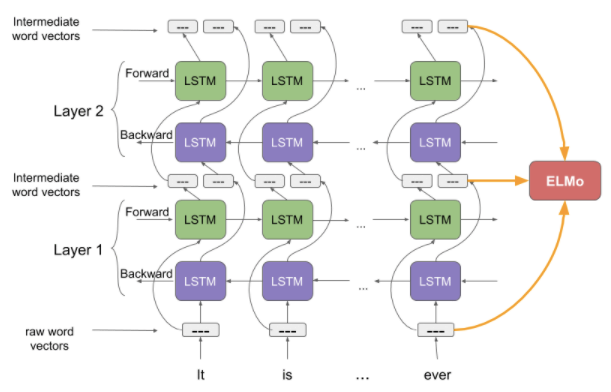

위 그림은 ELMo에서 임베딩 벡터를 만드는 방법을 보여준다.(1) 우선 이 모형은 두 개의 양방향 LSTM 층으로 이루어져 있다. 
문장의 단어들은 먼저 일반적인 임베딩을 통해 벡터로 변환되고 이 임베딩 벡터가 첫째 양방향 LSTM 층의 입력이 된다. 동일한 임베딩 벡터가 정방향 LSTM과 역방향 LSTM에 입력으로 들어가 각각의 출력을 만들어 내고, 이 둘을 합쳐서 첫째 층의 출력이 된다. 
이 때 주의할 점은 둘째 양방향 LSTM층의 입력으로 첫째 층의 출력이 들어갈때, 정방향과 역방향은 서로 합쳐지지 않고 각각 입력으로 사용된다. 즉 정방향은 계속 정방향으로만, 역방향은 역방향으로만 층이 쌓인다. 결과적으로 정방향 LSTM과 역방향 LSTM은 독립적으로 학습이 된다고 할 수 있다. 

(1) https://www.analyticsvidhya.com/blog/2019/03/learn-to-use-elmo-to-extract-features-from-text/

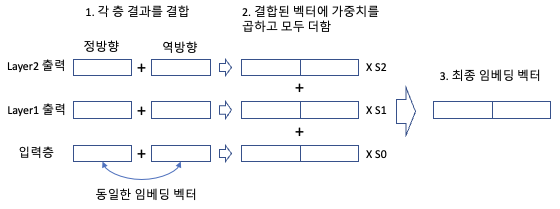

위 그림은 모형의 각 층에서 나온 결과를 합쳐서 최종 ELMo 임베딩 벡터를 만드는 과정을 보여준다. 먼저 각 층의 정방향 LSTM과 역방향 LSTM의 결과를 이어 붙여서(condatenate) 하나의 벡터로 만든다. 입력층은 하나의 임베딩 벡터이므로 같은 벡터 두 개를 결합한다. 둘째 단계에서는 각 층의 벡터에 가중치를 곱한다. 이는 각 층의 결과 중에서 어떤 것이 최종결과에 더 많은 영향을 미치도록 할 지를 결정하는 것으로 학습을 통해 조정될 수 있다. 마지막으로 입력층을 포함한 모든 층의 결과를 더해서 최종 임베딩 벡터를 만든다.

앞서 설명한 바와 같이 ELMo는 임베딩된 벡터를 전이해서 사용하는 것이 아니라 모형 자체를 전이하고 임베딩 벡터는 주어진 문장을 모형에 적용시켜서 생성한다. 따라서 내가 대상으로 하는 문장에 따라 임베딩 벡터는 가변적인 값을 갖게 된다. ELMo는 BERT의 중요한 기반이 되고, BERT의 이해에도 도움이 되므로 잘 이해하고 있는 것이 좋다. 지금은 BERT에 밀려서 거의 사용되지 않고 있지만, 나왔을 당시에는 그 당시의 많은 자연어 처리 분야에서 최고의 성능을 보인 모델이기도 하다.

모형이 비교적 어려운 것에 비해 사용은 오히려 쉽다. https://tfhub.dev/google/elmo/3 에서 사전 학습이 된 버전 3의 ELMo 모형을 다운로드해서 사용할 수 있다. 딥러닝 모형과 텐서플로우에 익숙한 경우, 웹 페이지의 설명과 실제 사용 예제를 잘 읽어보면 어렵지 않게 활용이 가능하다. 입력으로 토큰화 이전의 문장과 토큰화한 결과 두 가지를 모두 사용할 수 있으며 signature 매개변수로 지정할 수 있다.

출력은 다양한 형태를 담고 있는 딕셔너리 형태로 반환된다. 지금까지 공부한 ELMo의 워드 임베딩 결과는 딕셔너리에서 elmo 키의 값으로 제공된다. default 키는 모든 임베딩 벡터의 평균값으로 만들어진 하나의 벡터를 제공한다. 임베딩 벡터를 직접 사용하는 대신 문서 분류 등의 용도로 ELMo를 사용하고 싶다면 이 default값을 분류기의 입력으로 사용하면 된다.

## 4. Doc2Vec - 문맥을 고려한 문서 임베딩

딥러닝을 이용하는 대부분의 자연어처리 방법들이 단어에 대한 임베딩을 하는 반면, Doc2Vec은 문서에 대한 직접 임베딩을 한다는 점에서 큰 차이가 있다. BOW 방식의 카운트 벡터나 TF-IDF 벡터가 문서를 임베딩한다는 점에서 Doc2Vec과 유사한 면이 있으나, 이들과의 차이점은 단어의 순서를 고려한 문맥 정보가 BOW에서는 무시되지만 DocVec에서는 임베딩 벡터에 포함된다는 점이다.

Word2Vec에 대해 이해하고 있다면 Doc2Vec의 원리도 어렵지 않게 이해가 가능하다. Doc2Vec에서는 문서의 ID를 단어와 동일하게 취급해서 학습과정에 포함시킨다. 단 다른 단어들과 다른 점은 이 문서 ID는 그 문서에서 나온 학습 입력집합에 모두 포함된다는 것이다. 이렇게 함으로써 다른 단어들이 문맥정보가 반영되어 학습되는 동안 문서 ID도 그 문서에 나온 단어들의 문맥정보를 같이 학습하게 된다.

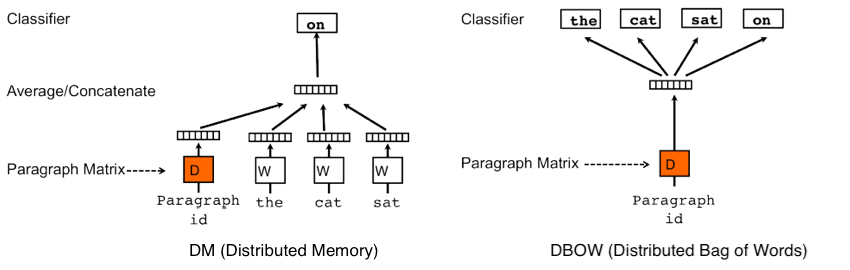
출처: "Distributed representations of sentences and documents.", Le, Quoc, and Tomas Mikolov

위 그림은 Doc2Vec의 두가지 학습 구조를 보여준다. 왼쪽의 DM(Distributed Memory)은 Word2Vec의 CBOW에 문서 ID를 추가한 형태의 학습이고, 오른쪽의 DBOW(Distributed Bag of Words)는 Skip-Gram에 문서 ID를 추가한 형태이다. DM에서는 앞의 단어들과 문서 ID를 이용해 다음 단어를 예측하는 방식으로 학습이 이루어지고, DBOW에서는 문서 ID로 일련의 단어들을 예측하는 방식으로 학습된다.

말뭉치에 있는 문서들에 대해 학습이 완료되면 문서들 간의 직접적인 비교가 가능해진다. Word2Vec과 같이 주어진 문서에 대해 유사한 문서를 찾거나 다양한 연산들이 가능하다. 또한 임베딩 벡터를 이용하여 문서 분류와 같은 목적으로 활용이 가능하다. 문서의 임베딩 벡터를 분류기의 입력으로 사용하면 감성분석 등 다양한 작업이 가능해진다.

Doc2Vec이 처음 나왔을 때는 신선한 시도였지만 지금은 역시 BERT의 등장과 함께 많이 사용되지 않는 기법이 되었다. Word2Vec과 마찬가지로 Gensim을 이용하면 어렵지 않게 사용이 가능하다.(2) 홈페이지의 튜토리얼에 나와 있는 설명과 예제를 이용하면 쉽게 실습이 가능하다.

(1) Le, Quoc, and Tomas Mikolov. "Distributed representations of sentences and documents." International conference on machine learning. PMLR, 2014.
(2) https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html
